# Análise de Requisições Diárias

## Contexto
O volume diário de requisições é um indicador importante para o planejamento operacional.
Oscilações inesperadas podem impactar desempenho, custos e qualidade do serviço.

## Objetivo
Analisar o comportamento das requisições ao longo do tempo, identificando padrões,
tendências, sazonalidade e possíveis anomalias.


In [1]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dataframe
df = pd.read_csv("../data/requisicoes_diarias.csv")
df.head()

,data,quantidade_requisicoes
0,2023-01-01,820
1,2023-01-02,1340
2,2023-01-03,1280
3,2023-01-04,1250
4,2023-01-05,1305


In [3]:
# Informações da Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   data                    59 non-null     object
 1   quantidade_requisicoes  59 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ KB


In [4]:
# Tratamento das datas
df['data'] = pd.to_datetime(df['data'])
df = df.sort_values('data')
df.reset_index(drop=True, inplace=True)

In [5]:
# Análise Exploratória
df.describe()

,quantidade_requisicoes
count,59.000000
mean,1435.423729
std,412.600341
min,760.000000
25%,1035.000000
50%,1475.000000
75%,1780.000000
max,2150.000000


In [6]:
# Média de requisições: 1435.423729
# Variação:
# Outliers: 

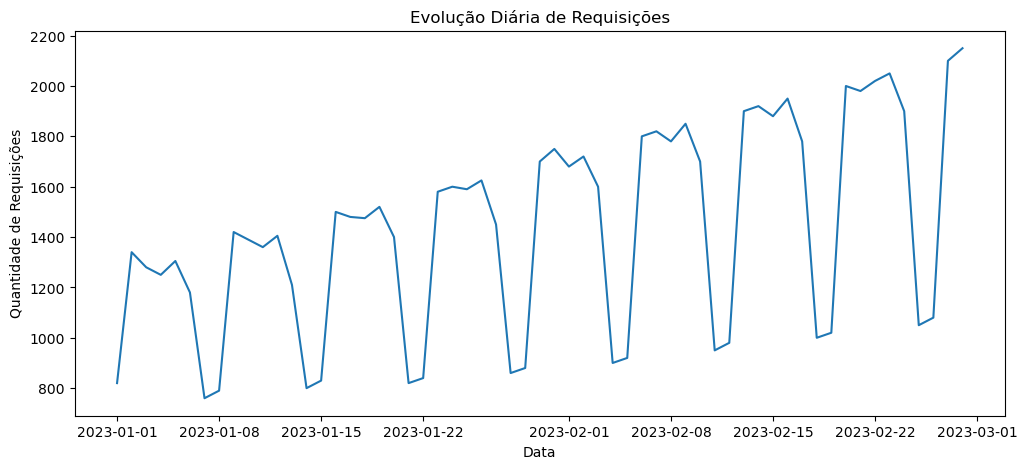

In [7]:
# Evolução Temporal
plt.figure(figsize=(12,5))
plt.plot(df['data'], df['quantidade_requisicoes'])
plt.title("Evolução Diária de Requisições")
plt.xlabel("Data")
plt.ylabel("Quantidade de Requisições")
plt.show()

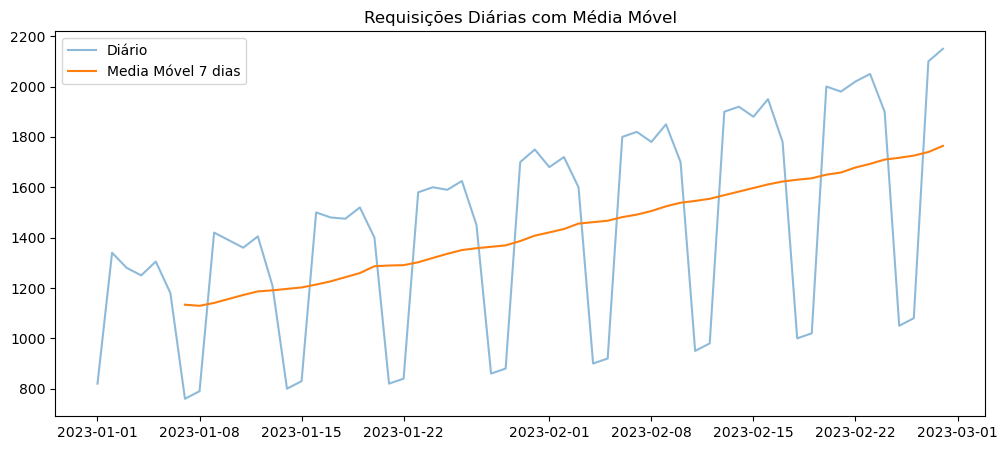

In [8]:
# Média Móvel
df['media_movel_7d'] = df['quantidade_requisicoes'].rolling(7).mean()

plt.figure(figsize=(12,5))
plt.plot(df['data'], df['quantidade_requisicoes'], alpha=0.5, label='Diário')
plt.plot(df['data'], df['media_movel_7d'], label='Media Móvel 7 dias')
plt.legend()
plt.title("Requisições Diárias com Média Móvel")
plt.show()

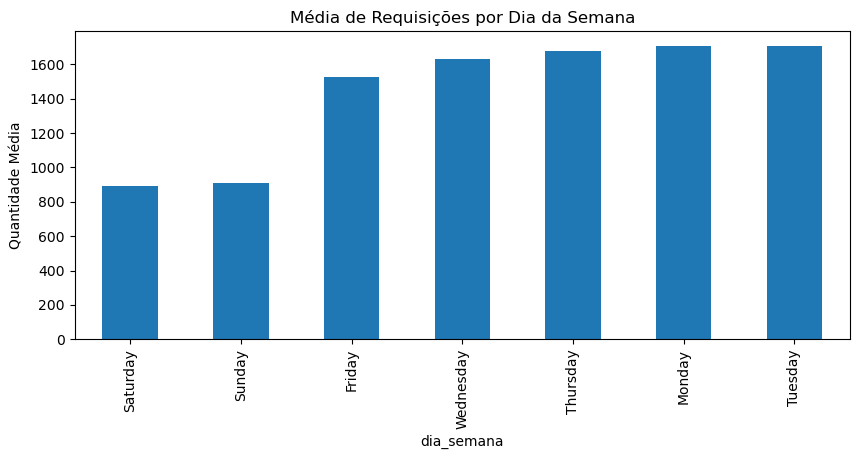

In [9]:
# Análise por Dia da Semana
df['dia_semana'] = df['data'].dt.day_name()

media_dia = df.groupby('dia_semana')['quantidade_requisicoes'].mean().sort_values()

media_dia.plot(kind='bar', figsize=(10,4), title="Média de Requisições por Dia da Semana")
plt.ylabel("Quantidade Média")
plt.show()

## Principais Insights

- Observa-se uma tendência clara de crescimento no volume de requisições ao longo do período.
- Fins de semana apresentam queda significativa no volume.
- Segundas e terças-feiras concentram os maiores volumes médios.
- A média móvel evidencia crescimento consistente, reduzindo o efeito de ruídos diários.

## Conclusão

A análise permitiu identificar padrões importantes no comportamento das requisições,
auxiliando no entendimento da demanda operacional.

## Próximos Passos
- Criar alertas para volumes atípicos
- Desenvolver um modelo de previsão de demanda
- Integrar os dados a um dashboard gerencial